In [ ]:
pip install scikit-learn-extra

     |████████████████████████████████| 624kB 5.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp36-cp36m-linux_x86_64.whl size=340323 sha256=207688e230eec8c7c4a404786c5e54c41870e16263e999121a9b4d5a2d839ae0
  Stored in directory: /root/.cache/pip/wheels/04/01/0f/943bffb48bac048fa216b4325f1a6c939491ccb0ff500e08f4
Successfully built scikit-learn-extra


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster
import seaborn as sns
from sklearn import metrics
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
# функции для вычисления метрик качества кластерищации
#Calinski-Harabasz index 
def Cal_Har_index(data,labels):
    res = metrics.calinski_harabasz_score(data, labels)
    print("Calinski-Harabasz index:\t{0:.5f}".format(res))

#Davies–Bouldin index 
def Dav_Boul_index(data,labels):
    res = metrics.davies_bouldin_score(data, labels)
    print("Davies–Bouldin index:\t\t{0:.5f}".format(res))    

#Silhouette Coefficient 
def Silhouette_coeff(data,labels,is_manhattan):
    res = 0
    if is_manhattan:
      res = metrics.silhouette_score(data, labels, metric='manhattan')
    else:
      res = metrics.silhouette_score(data, labels, metric='euclidean')
    print("Silhouette Coefficient:\t\t{0:.5f}".format(res))   

def mean_of_subset(data):
    length, parameters = data.shape
    centroid = []
    for i in range(parameters):
        centroid.append(np.sum(data[:, i])/length)
    return np.array(centroid)
#Cluster_cohesion
def Cluster_cohesion(data,labels):
    #этой метрики нет в арсенале sklearn, поэтому реализуем её вручную
    num_clusters = np.unique(labels)
    
    wss = 0
    for k in range(data.shape[0]):
        cluster_subset = []
        for i in range(data.shape[0]):
            if labels[i] == k:
                cluster_subset.append(data[i])
                
        cluster = np.array(cluster_subset)
        if cluster.shape[0] != 0:
            mean_elem = mean_of_subset(cluster)  
        else:
            mean_elem = np.zeros(shape=(data.shape[1]))
        
        for i in range(cluster.shape[0]):
            temp = 0
            for j in range(cluster.shape[1]):
                temp += (cluster[i][j]-mean_elem[j])**2
            wss += temp
    #return wss
    print("Cluster_cohesion:\t\t{0:.5f}".format(wss)) 


def print_metrics(data,labels, true_labels = None, is_manhattan = False):
  Cal_Har_index(data,labels)
  Dav_Boul_index(data,labels)
  Silhouette_coeff(data,labels, is_manhattan)
  Cluster_cohesion(data,labels)
  if true_labels is not None:
    # Adjasted Rand Index
    res = metrics.adjusted_rand_score(true_labels, labels)
    print("Adjasted Rand Index:\t\t{0}\n  ".format(res), end='')


In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


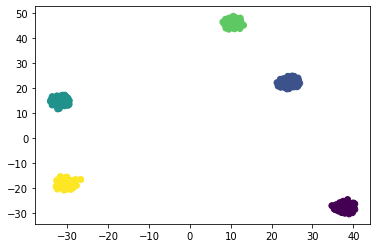

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples = 1000,n_features=2, centers=5,cluster_std = 1,center_box=(-58.0,58.0),shuffle=False)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.show()

In [ ]:
df = pd.DataFrame(data=np.c_[X,y],columns=['X','Y','Class'])
df.to_csv('data_1.csv')

In [ ]:
df1 = pd.read_csv('data_1.csv')
df1.drop(columns='Unnamed: 0', inplace=True)
df1.head()

,X,Y,Class
0,37.705379,-27.489613,0.0
1,39.985478,-28.768783,0.0
2,37.153046,-29.906811,0.0
3,36.324096,-28.425437,0.0
4,38.068208,-26.800032,0.0


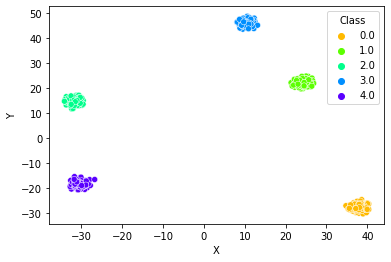

In [ ]:
sns.scatterplot(x="X", y="Y", hue='Class', data=df1, palette=sns.color_palette("gist_rainbow", n_colors=5))

In [ ]:
from sklearn.preprocessing import StandardScaler
X = df1[['X','Y']]
y = df1['Class']
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

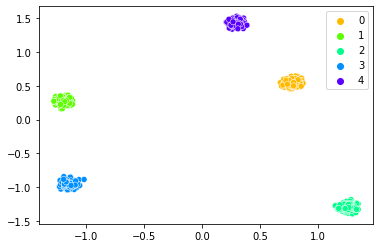

In [ ]:
clustered_X = cluster.KMeans(n_clusters=5, random_state=0).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustered_X.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=5))

In [ ]:
print_metrics(X,clustered_X.labels_,y)

Calinski-Harabasz index:	193636.11747
Davies–Bouldin index:		0.07375
Silhouette Coefficient:		0.94747
Cluster_cohesion:		2.56596
Adjasted Rand Index:		1.0
  

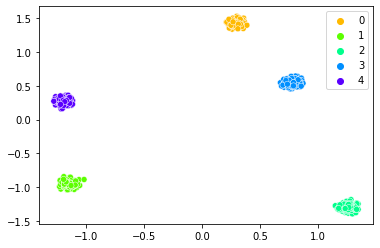

In [ ]:
kmedoids = KMedoids(n_clusters=5, metric='manhattan',init='k-medoids++', random_state=0).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=kmedoids.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=5))

In [ ]:
print_metrics(X,kmedoids.labels_,y, True)

Calinski-Harabasz index:	193636.11747
Davies–Bouldin index:		0.07375
Silhouette Coefficient:		0.94413
Cluster_cohesion:		2.56596
Adjasted Rand Index:		1.0
  

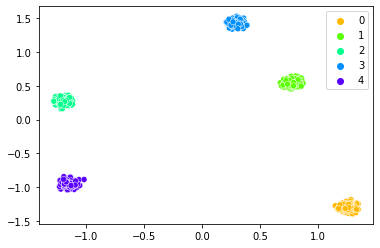

In [ ]:
clustering = DBSCAN(eps=0.5, min_samples=10, metric='euclidean').fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=5))

In [ ]:
print_metrics(X,kmedoids.labels_,y)

Calinski-Harabasz index:	193636.11747
Davies–Bouldin index:		0.07375
Silhouette Coefficient:		0.94747
Cluster_cohesion:		2.56596
Adjasted Rand Index:		1.0
  

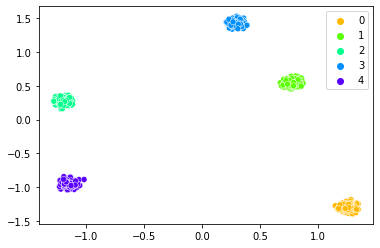

In [ ]:
clustering = DBSCAN(eps=0.5, min_samples=10, metric='manhattan').fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=5))

In [ ]:
print_metrics(X,kmedoids.labels_,y, True)

Calinski-Harabasz index:	193636.11747
Davies–Bouldin index:		0.07375
Silhouette Coefficient:		0.94413
Cluster_cohesion:		2.56596
Adjasted Rand Index:		1.0
  

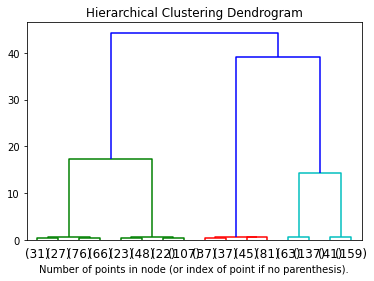

In [ ]:


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

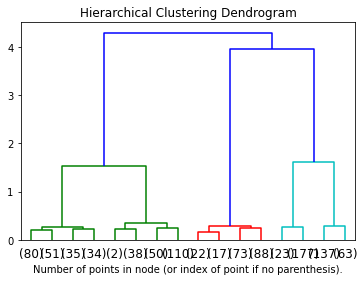

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='manhattan', linkage='complete')
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

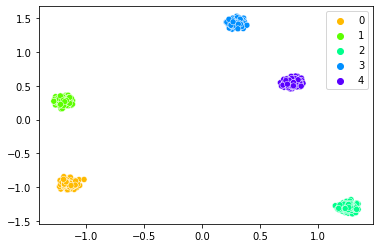

In [ ]:
clustering = AgglomerativeClustering(affinity='euclidean', n_clusters=5).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=5))

In [ ]:
print_metrics(X,clustering.labels_,y)

Calinski-Harabasz index:	193636.11747
Davies–Bouldin index:		0.07375
Silhouette Coefficient:		0.94747
Cluster_cohesion:		2.56596
Adjasted Rand Index:		1.0
  

Calinski-Harabasz index:	193636.11747
Davies–Bouldin index:		0.07375
Silhouette Coefficient:		0.94413
Cluster_cohesion:		2.56596
Adjasted Rand Index:		1.0
  

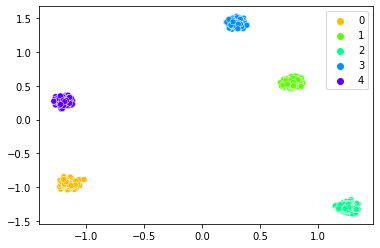

In [ ]:
clustering = AgglomerativeClustering(affinity='manhattan',linkage='complete', n_clusters=5).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=5))
print_metrics(X,clustering.labels_,y, True)

Датасет 2: линейно разделимые множества (группы расположены близко или касаются друг друга)

In [ ]:
df2 = pd.read_table('4_classes.txt',header=None,names=['X','Y','Class'], delimiter=' ')
df2.head()

,X,Y,Class
0,-8.311109,0.332308,1
1,-2.858029,8.874602,2
2,-10.888889,-0.847230,1
3,-13.198113,7.996866,0
4,-6.244634,0.205405,1


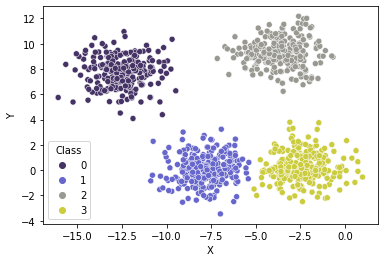

In [ ]:
sns.scatterplot(x="X", y="Y", hue='Class', data=df2, palette=sns.color_palette("gist_stern", n_colors=4))

In [ ]:
X = df2[['X','Y']]
y = df2['Class']
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

K-means с евклидовым рассотоянием и манхеттанским (k-mediods)

Calinski-Harabasz index:	4195.79134
Davies–Bouldin index:		0.41994
Silhouette Coefficient:		0.69482
Cluster_cohesion:		146.64987
Adjasted Rand Index:		0.9973306577635366
  

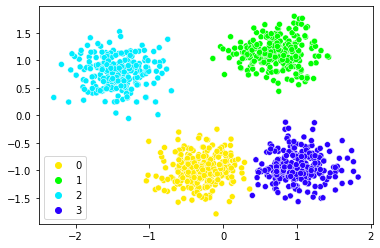

In [ ]:
clustered_X = cluster.KMeans(n_clusters=4, random_state=0).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustered_X.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=4))
print_metrics(X,clustered_X.labels_,y)

Calinski-Harabasz index:	4194.93062
Davies–Bouldin index:		0.41999
Silhouette Coefficient:		0.67309
Cluster_cohesion:		146.67775
Adjasted Rand Index:		1.0
  

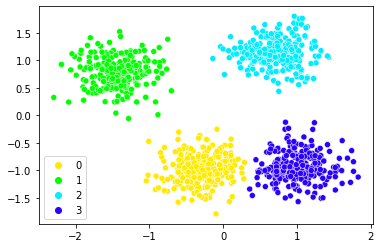

In [ ]:
kmedoids = KMedoids(n_clusters=4, metric='manhattan',init='k-medoids++', random_state=0).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=kmedoids.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=4))
print_metrics(X,kmedoids.labels_,y, True)

DBSCAN с евклидовским и манхеттанским расстояними

Calinski-Harabasz index:	1944.65524
Davies–Bouldin index:		1.74070
Silhouette Coefficient:		0.65576
Cluster_cohesion:		121.91237
Adjasted Rand Index:		0.9419083154246728
  

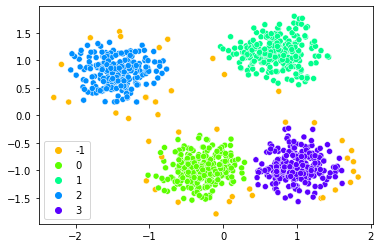

In [ ]:
clustering = DBSCAN(eps=0.2, min_samples=10, metric='euclidean').fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=5))
print_metrics(X,clustering.labels_,y)

In [ ]:
pd.Series(clustering.labels_).unique()

array([ 0,  1, -1,  2,  3,  5,  4])

Calinski-Harabasz index:	1274.98767
Davies–Bouldin index:		1.50287
Silhouette Coefficient:		0.60710
Cluster_cohesion:		104.24570
Adjasted Rand Index:		0.8792528727799455
  

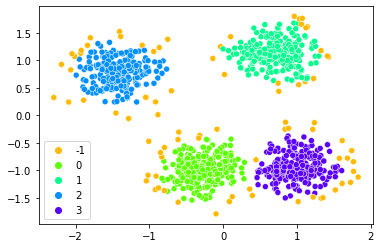

In [ ]:
clustering = DBSCAN(eps=0.27, min_samples=25, metric='manhattan').fit(X)
n_cl = len(pd.Series(clustering.labels_).unique())
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=n_cl))
print_metrics(X,clustering.labels_,y)

Иерархический агломеративный метод с евклидовым и манхеттанским расстояниями

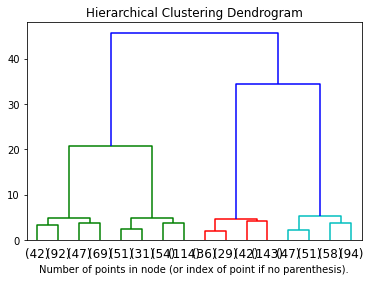

In [ ]:

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

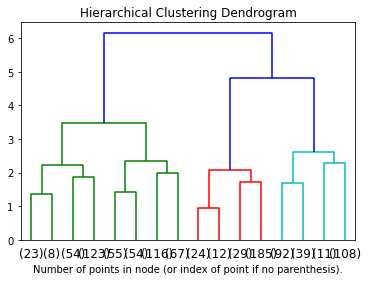

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='manhattan', linkage='complete')
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Calinski-Harabasz index:	4194.93062
Davies–Bouldin index:		0.41999
Silhouette Coefficient:		0.69478
Cluster_cohesion:		146.67775
Adjasted Rand Index:		1.0
  

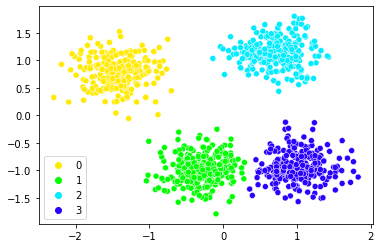

In [ ]:
clustering = AgglomerativeClustering(affinity='euclidean',linkage='complete', n_clusters=4).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=4))
print_metrics(X,clustering.labels_,y)

Calinski-Harabasz index:	4194.35674
Davies–Bouldin index:		0.42002
Silhouette Coefficient:		0.67301
Cluster_cohesion:		146.69635
Adjasted Rand Index:		0.994672057173748
  

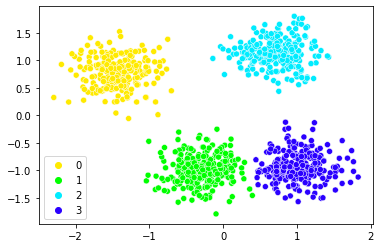

In [ ]:
clustering = AgglomerativeClustering(affinity='manhattan',linkage='average', n_clusters=4).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=4))
print_metrics(X,clustering.labels_,y, True)

Датасет 3: линейно неразделимое множество (средняя площадь пересечения классов 10-20%)

In [ ]:
df3 = pd.read_table('20percent.txt',header=None,names=['X','Y','Class'], delimiter=' ')
df3.head()

,X,Y,Class
0,-3.090713,-0.016803,0
1,-3.404082,-0.262256,0
2,-3.056774,2.329708,0
3,-2.314324,0.691242,0
4,-4.246322,0.951579,0


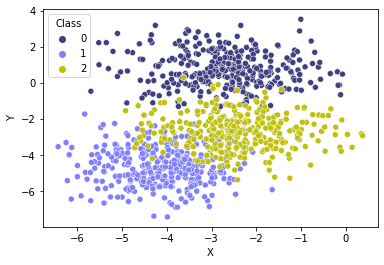

In [ ]:
X = df3[['X','Y']]
y = df3['Class']
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
sns.scatterplot(x="X", y="Y", hue='Class', data=df3, palette=sns.color_palette("gist_stern", n_colors=3))

K-means с евклидовым рассотоянием и манхеттанским (k-mediods)

Calinski-Harabasz index:	970.38623
Davies–Bouldin index:		0.87644
Silhouette Coefficient:		0.41833
Cluster_cohesion:		678.74555
Adjasted Rand Index:		0.6607930282857949
  

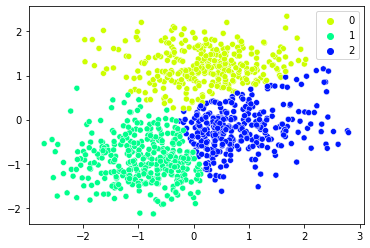

In [ ]:
clustered_X = cluster.KMeans(n_clusters=3, random_state=0).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustered_X.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=3))
print_metrics(X,clustered_X.labels_,y)

Calinski-Harabasz index:	938.35585
Davies–Bouldin index:		0.89760
Silhouette Coefficient:		0.41680
Cluster_cohesion:		693.87615
Adjasted Rand Index:		0.7359760536374653
  

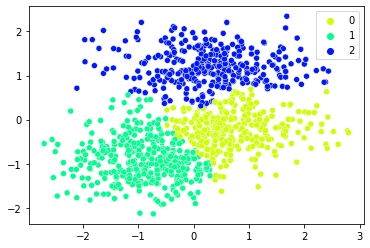

In [ ]:
kmedoids = KMedoids(n_clusters=3, metric='manhattan',init='k-medoids++', random_state=0).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=kmedoids.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=3))
print_metrics(X,kmedoids.labels_,y, True)

DBSCAN с евклидовским и манхеттанским расстояними

Calinski-Harabasz index:	109.19491
Davies–Bouldin index:		2.44930
Silhouette Coefficient:		0.03327
Cluster_cohesion:		84.46853
Adjasted Rand Index:		0.19174515278998508
  

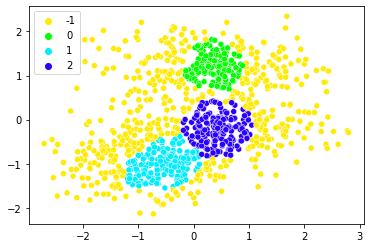

In [ ]:
clustering = DBSCAN(eps=0.35, min_samples=57, metric='euclidean').fit(X)
n_cl = len(pd.Series(clustering.labels_).unique())
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=n_cl))
print_metrics(X,clustering.labels_,y)

Метрики качества, если убрать точки, которые DBSCAN считает выбросами

In [ ]:
df_c = pd.DataFrame(np.c_[X,clustering.labels_,y], columns=['X','Y','Class','Tr_Class'])
df_c = df_c[df_c.Class != -1]
print_metrics(df_c[['X','Y']].values,df_c.Class.values,df_c.Tr_Class.values)

Calinski-Harabasz index:	1365.13836
Davies–Bouldin index:		0.58730
Silhouette Coefficient:		0.57117
Cluster_cohesion:		84.46853
Adjasted Rand Index:		0.7927715481810441
  

Calinski-Harabasz index:	133.68642
Davies–Bouldin index:		2.33256
Silhouette Coefficient:		0.09771
Cluster_cohesion:		124.96802
Adjasted Rand Index:		0.25567581340053697
  

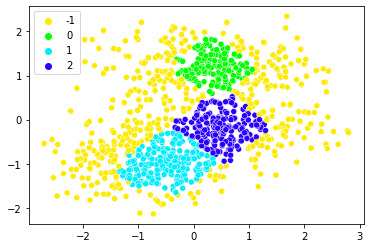

In [ ]:
clustering = DBSCAN(eps=0.5, min_samples=70, metric='manhattan').fit(X)
n_cl = len(pd.Series(clustering.labels_).unique())
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=n_cl))
print_metrics(X,clustering.labels_,y)

In [ ]:
df_c = pd.DataFrame(np.c_[X,clustering.labels_,y], columns=['X','Y','Class','Tr_Class'])
df_c = df_c[df_c.Class != -1]
print_metrics(df_c[['X','Y']].values,df_c.Class.values,df_c.Tr_Class.values)

Calinski-Harabasz index:	1226.46158
Davies–Bouldin index:		0.65764
Silhouette Coefficient:		0.52327
Cluster_cohesion:		124.96802
Adjasted Rand Index:		0.7499870791452407
  

Иерархический агломеративный метод с евклидовым и манхеттанским расстояниями

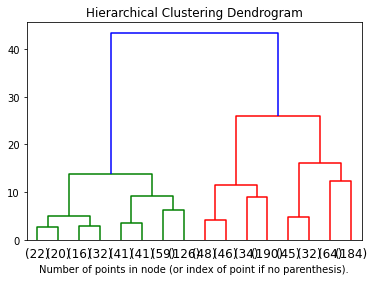

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

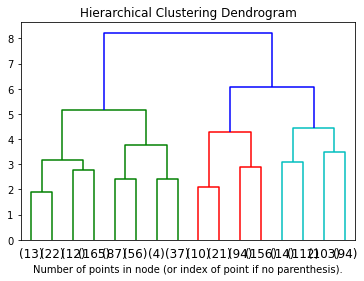

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='manhattan', linkage='complete')
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Calinski-Harabasz index:	890.60899
Davies–Bouldin index:		0.94286
Silhouette Coefficient:		0.39275
Cluster_cohesion:		717.72626
Adjasted Rand Index:		0.73452850570127
  

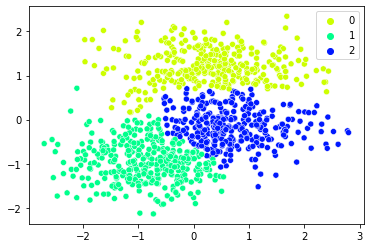

In [ ]:
clustering = AgglomerativeClustering(affinity='euclidean',linkage='ward', n_clusters=3).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=3))
print_metrics(X,clustering.labels_,y)

Calinski-Harabasz index:	573.82687
Davies–Bouldin index:		0.79904
Silhouette Coefficient:		0.33608
Cluster_cohesion:		929.75382
Adjasted Rand Index:		0.43387658913892135
  

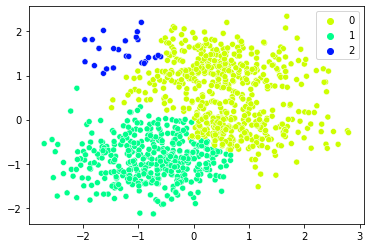

In [ ]:
clustering = AgglomerativeClustering(affinity='manhattan',linkage='average', n_clusters=3).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=3))
print_metrics(X,clustering.labels_,y, True)

Датасет 4: линейно неразделимое множество (средняя площадь пересечения классов 50-70%)

In [ ]:
df4 = pd.read_table('70percent.txt',header=None,names=['X','Y','Class'], delimiter=' ')
df4.head()

,X,Y,Class
0,7.464167,-1.024549,0
1,5.654921,1.884601,0
2,2.342275,-0.876452,0
3,6.256039,-4.669304,0
4,3.905153,0.174061,0


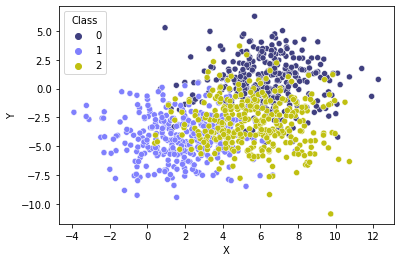

In [ ]:
X = df4[['X','Y']]
y = df4['Class']
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
sns.scatterplot(x="X", y="Y", hue='Class', data=df4, palette=sns.color_palette("gist_stern", n_colors=3))

K-means с евклидовым рассотоянием и манхеттанским (k-mediods)

Calinski-Harabasz index:	893.28039
Davies–Bouldin index:		0.91770
Silhouette Coefficient:		0.37113
Cluster_cohesion:		716.34865
Adjasted Rand Index:		0.4093715863413085
  

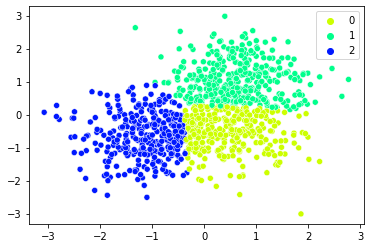

In [ ]:
clustered_X = cluster.KMeans(n_clusters=3, random_state=0).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustered_X.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=3))
print_metrics(X,clustered_X.labels_,y)

Calinski-Harabasz index:	627.74591
Davies–Bouldin index:		1.18631
Silhouette Coefficient:		0.31671
Cluster_cohesion:		885.24184
Adjasted Rand Index:		0.26472571865716205
  

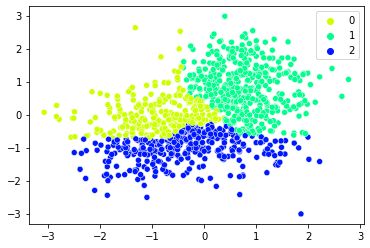

In [ ]:
kmedoids = KMedoids(n_clusters=3, metric='manhattan',init='k-medoids++', random_state=0).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=kmedoids.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=3))
print_metrics(X,kmedoids.labels_,y, True)

DBSCAN с евклидовским и манхеттанским расстояними

Calinski-Harabasz index:	55.30893
Davies–Bouldin index:		2.61238
Silhouette Coefficient:		-0.03346
Cluster_cohesion:		125.94660
Adjasted Rand Index:		0.07250971011492462
  

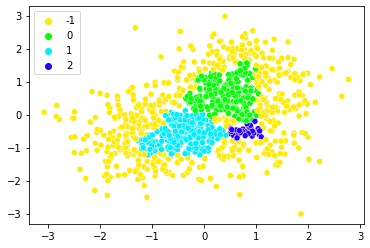

In [ ]:
clustering = DBSCAN(eps=0.21, min_samples=18, metric='euclidean').fit(X)
n_cl = len(pd.Series(clustering.labels_).unique())
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=n_cl))
print_metrics(X,clustering.labels_,y)

In [ ]:
df_c = pd.DataFrame(np.c_[X,clustering.labels_,y], columns=['X','Y','Class','Tr_Class'])
df_c = df_c[df_c.Class != -1]
print_metrics(df_c[['X','Y']].values,df_c.Class.values,df_c.Tr_Class.values)

Calinski-Harabasz index:	533.83432
Davies–Bouldin index:		0.62730
Silhouette Coefficient:		0.43302
Cluster_cohesion:		125.94660
Adjasted Rand Index:		0.2587415004483208
  

Число кластеров: 2
Calinski-Harabasz index:	2.39618
Davies–Bouldin index:		17.89319
Silhouette Coefficient:		0.25027
Cluster_cohesion:		1141.27070
Adjasted Rand Index:		0.0030013922604513583
  

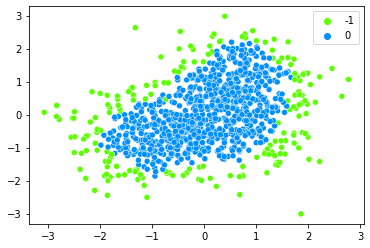

In [ ]:
clustering = DBSCAN(eps=0.3, min_samples=12, metric='manhattan').fit(X)
n_cl = len(pd.Series(clustering.labels_).unique())
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=n_cl))

print("Число кластеров: " + str(n_cl))
if (n_cl > 1):
  print_metrics(X,clustering.labels_,y, True)

In [ ]:
df_c = pd.DataFrame(np.c_[X,clustering.labels_,y], columns=['X','Y','Class','Tr_Class'])
df_c = df_c[df_c.Class != -1]
print_metrics(df_c[['X','Y']].values,df_c.Class.values,df_c.Tr_Class.values)

ValueError: ignored

Иерархический агломеративный метод с евклидовым и манхеттанским расстояниями

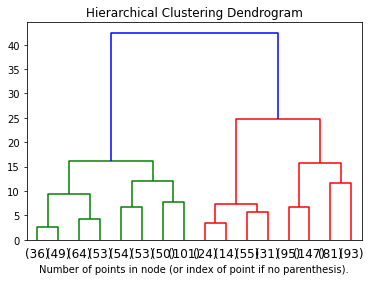

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

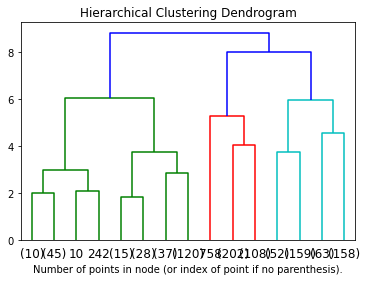

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='manhattan', linkage='complete')
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Calinski-Harabasz index:	748.03621
Davies–Bouldin index:		0.84534
Silhouette Coefficient:		0.35191
Cluster_cohesion:		799.81632
Adjasted Rand Index:		0.38590057728719396
  

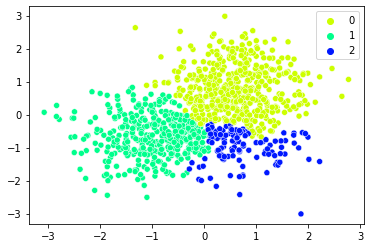

In [ ]:
clustering = AgglomerativeClustering(affinity='euclidean',linkage='complete', n_clusters=3).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=3))
print_metrics(X,clustering.labels_,y)

Calinski-Harabasz index:	583.14001
Davies–Bouldin index:		1.13538
Silhouette Coefficient:		0.26458
Cluster_cohesion:		921.74844
Adjasted Rand Index:		0.2574875705750191
  

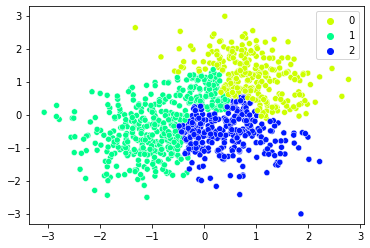

In [ ]:
clustering = AgglomerativeClustering(affinity='manhattan',linkage='complete', n_clusters=3).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=3))
print_metrics(X,clustering.labels_,y, True)

Датасет 5: 

In [ ]:
from sklearn import datasets
np.random.seed(0)
n_samples = 1500
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
random_state = 170

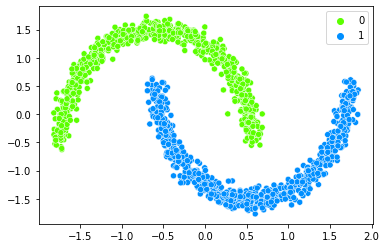

In [ ]:
X = noisy_moons[0]
y = noisy_moons[1]
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette=sns.color_palette("gist_rainbow", n_colors=2))

K-means с евклидовым рассотоянием и манхеттанским (k-mediods)

Calinski-Harabasz index:	2092.27173
Davies–Bouldin index:		0.81005
Silhouette Coefficient:		0.49709
Cluster_cohesion:		1251.71584
Adjasted Rand Index:		0.4952793333951908
  

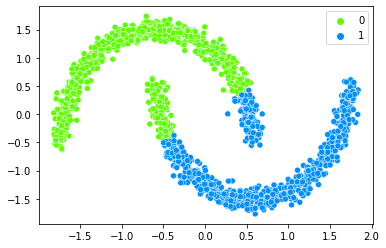

In [ ]:
clustered_X = cluster.KMeans(n_clusters=2, random_state=0).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustered_X.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=2))
print_metrics(X,clustered_X.labels_,y)

Calinski-Harabasz index:	2057.26868
Davies–Bouldin index:		0.81510
Silhouette Coefficient:		0.49080
Cluster_cohesion:		1264.03949
Adjasted Rand Index:		0.46204132834725964
  

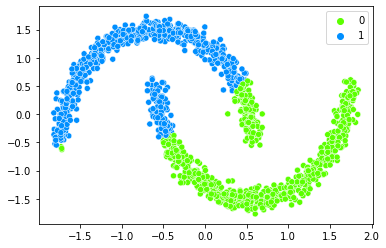

In [ ]:
kmedoids = KMedoids(n_clusters=2, metric='manhattan',init='k-medoids++', random_state=0).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=kmedoids.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=2))
print_metrics(X,kmedoids.labels_,y, True)

DBSCAN с евклидовским и манхеттанским расстояними

Calinski-Harabasz index:	1319.88869
Davies–Bouldin index:		1.01584
Silhouette Coefficient:		0.39224
Cluster_cohesion:		1594.81104
Adjasted Rand Index:		1.0
  

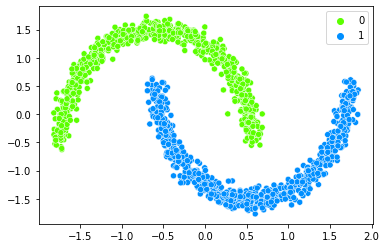

In [ ]:
clustering = DBSCAN(eps=0.35, min_samples=57, metric='euclidean').fit(X)
n_cl = len(pd.Series(clustering.labels_).unique())
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=n_cl))
print_metrics(X,clustering.labels_,y)

Calinski-Harabasz index:	1319.88869
Davies–Bouldin index:		1.01584
Silhouette Coefficient:		0.38323
Cluster_cohesion:		1594.81104
Adjasted Rand Index:		1.0
  

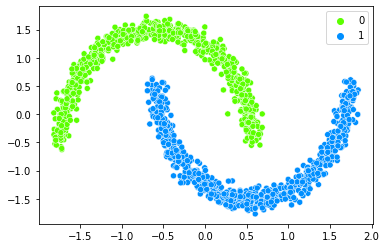

In [ ]:
clustering = DBSCAN(eps=0.5, min_samples=70, metric='manhattan').fit(X)
n_cl = len(pd.Series(clustering.labels_).unique())
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=n_cl))
print_metrics(X,clustering.labels_,y, True)

Иерархический агломеративный метод с евклидовым и манхеттанским расстояниями

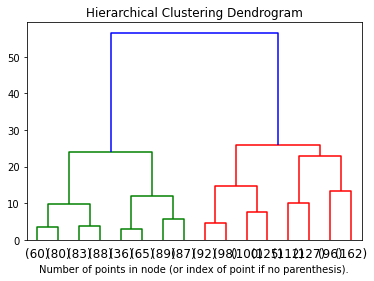

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

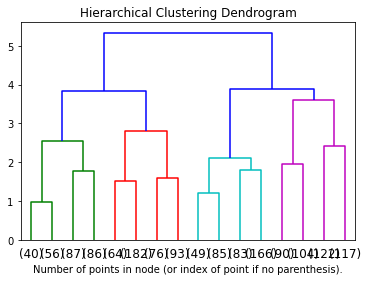

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='manhattan', linkage='complete')
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Calinski-Harabasz index:	1319.88869
Davies–Bouldin index:		1.01584
Silhouette Coefficient:		0.39224
Cluster_cohesion:		1594.81104
Adjasted Rand Index:		1.0
  

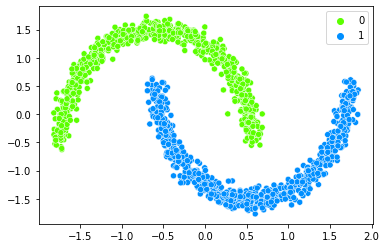

In [ ]:
clustering = AgglomerativeClustering(affinity='euclidean',linkage='single', n_clusters=2).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=2))
print_metrics(X,clustering.labels_,y)

Calinski-Harabasz index:	1319.88869
Davies–Bouldin index:		1.01584
Silhouette Coefficient:		0.38323
Cluster_cohesion:		1594.81104
Adjasted Rand Index:		1.0
  

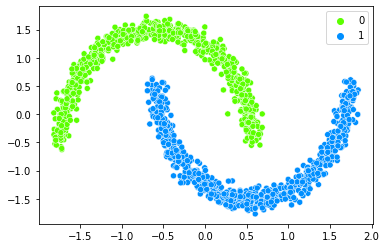

In [ ]:
clustering = AgglomerativeClustering(affinity='manhattan',linkage='single', n_clusters=2).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=2))
print_metrics(X,clustering.labels_,y,True)

Датасет 6:

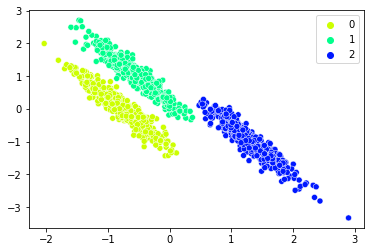

In [ ]:
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
X = aniso[0]
y = aniso[1]
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette=sns.color_palette("gist_rainbow", n_colors=3))

K-means с евклидовым рассотоянием и манхеттанским (k-mediods)

Calinski-Harabasz index:	3637.91297
Davies–Bouldin index:		0.70025
Silhouette Coefficient:		0.50997
Cluster_cohesion:		511.92170
Adjasted Rand Index:		0.6074569020304235
  

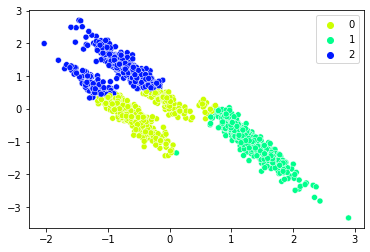

In [ ]:
clustered_X = cluster.KMeans(n_clusters=3, random_state=0).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustered_X.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=3))
print_metrics(X,clustered_X.labels_,y)

Calinski-Harabasz index:	2453.17409
Davies–Bouldin index:		0.78958
Silhouette Coefficient:		0.48512
Cluster_cohesion:		701.35184
Adjasted Rand Index:		0.39306428690006484
  

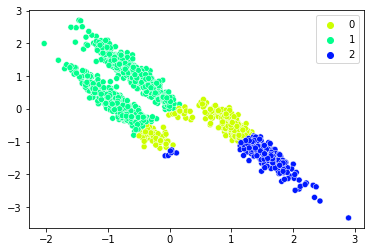

In [ ]:
kmedoids = KMedoids(n_clusters=3, metric='manhattan',init='k-medoids++', random_state=0).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=kmedoids.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=3))
print_metrics(X,kmedoids.labels_,y, True)

DBSCAN с евклидовским и манхеттанским расстояними

Calinski-Harabasz index:	1401.44504
Davies–Bouldin index:		2.61179
Silhouette Coefficient:		0.46237
Cluster_cohesion:		569.25084
Adjasted Rand Index:		0.9718918448206937
  

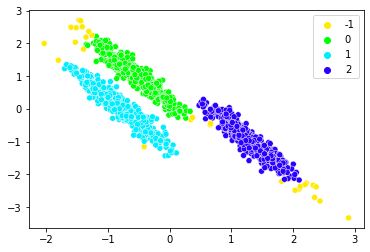

In [ ]:
clustering = DBSCAN(eps=0.16, min_samples=6, metric='euclidean').fit(X)
n_cl = len(pd.Series(clustering.labels_).unique())
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=n_cl))
print_metrics(X,clustering.labels_,y)



Calinski-Harabasz index:	1376.77190
Davies–Bouldin index:		2.40096
Silhouette Coefficient:		0.40455
Cluster_cohesion:		547.56401
Adjasted Rand Index:		0.9615839828759644
  

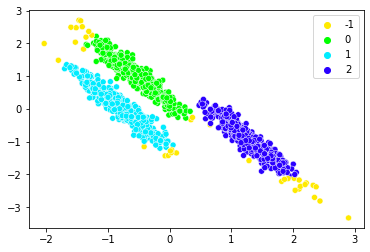

In [ ]:
clustering = DBSCAN(eps=0.2, min_samples=7, metric='manhattan').fit(X)
n_cl = len(pd.Series(clustering.labels_).unique())
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=n_cl))
print_metrics(X,clustering.labels_,y, True)

Иерархический агломеративный метод с евклидовым и манхеттанским расстояниями

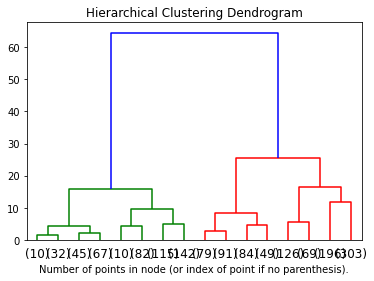

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

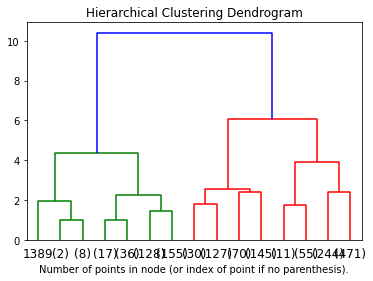

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='manhattan', linkage='complete')
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Calinski-Harabasz index:	1609.54730
Davies–Bouldin index:		0.67723
Silhouette Coefficient:		0.31312
Cluster_cohesion:		952.27098
Adjasted Rand Index:		0.21165674928722394
  

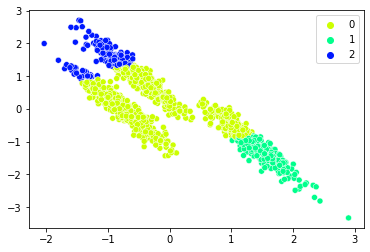

In [ ]:
clustering = AgglomerativeClustering(affinity='euclidean',linkage='complete', n_clusters=3).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=3))
print_metrics(X,clustering.labels_,y)

Calinski-Harabasz index:	2733.60533
Davies–Bouldin index:		0.81425
Silhouette Coefficient:		0.46286
Cluster_cohesion:		644.86849
Adjasted Rand Index:		0.3690545885035546
  

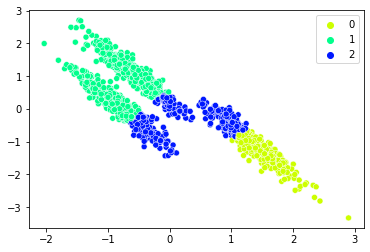

In [ ]:
clustering = AgglomerativeClustering(affinity='manhattan',linkage='complete', n_clusters=3).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=3))
print_metrics(X,clustering.labels_,y,True)

Датасет 7:

In [ ]:
df7 = pd.read_csv('abalone.csv') 
df7.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
pd.Series(df7.isna().sum())

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Пропущенных значений нет

In [ ]:
from sklearn.preprocessing import LabelEncoder
#df = pd.get_dummies(df, columns=['Genotype', 'Treatment', 'Behavior'])
enc = LabelEncoder()
df7['Sex'] = enc.fit_transform(df7['Sex'])

In [ ]:
df7.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


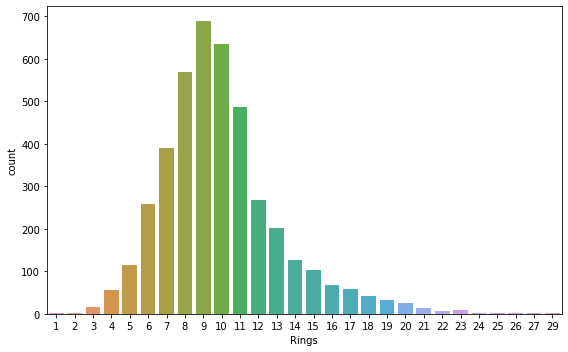

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(df7.Rings)
plt.tight_layout()

In [ ]:
df_1 = df7.copy()
Age = []
for i in df_1["Rings"]:
    if i <= 7:
        Age.append("0")
    if i >= 8 and i <= 12 :
        Age.append("1")
    if i >= 13 :
        Age.append("2")

df_1["Age"] = Age
df_1.drop("Rings" , axis =1,inplace=True)
df_1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


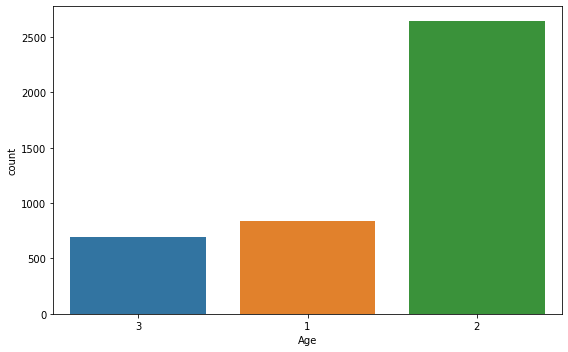

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(df_1.Age)
plt.tight_layout()

In [ ]:
feature_names = list(df_1.columns)
feature_names.remove('Age')
X = df_1[feature_names]
y = df_1['Age']
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

K-means с евклидовым рассотоянием и манхеттанским (k-mediods)

In [ ]:
clustered_X = cluster.KMeans(n_clusters=3, random_state=0).fit(X)
print_metrics(X,clustered_X.labels_,y)

Calinski-Harabasz index:	4141.03163
Davies–Bouldin index:		1.01720
Silhouette Coefficient:		0.34819
Cluster_cohesion:		11197.62971
Adjasted Rand Index:		0.14614847327385136
  

In [ ]:
kmedoids = KMedoids(n_clusters=3, metric='manhattan',init='k-medoids++', random_state=0).fit(X)
print_metrics(X,kmedoids.labels_,y, True)

Calinski-Harabasz index:	4034.79284
Davies–Bouldin index:		1.04693
Silhouette Coefficient:		0.41138
Cluster_cohesion:		11391.95557
Adjasted Rand Index:		0.13801299533211842
  

DBSCAN с евклидовским и манхеттанским расстояними

In [ ]:
clustering = DBSCAN(eps=0.9, min_samples=50, metric='euclidean').fit(X)
n_cl = len(pd.Series(clustering.labels_).unique())
print("Число кластеров: " + str(n_cl-1))
if (n_cl > 1):
  print_metrics(X,clustering.labels_,y)

Число кластеров: 3
Calinski-Harabasz index:	1100.94392
Davies–Bouldin index:		1.43267
Silhouette Coefficient:		0.23551
Cluster_cohesion:		15121.50144
Adjasted Rand Index:		0.08204256813045317
  

In [ ]:
names = ['S_'+str(i) for i in range(X.shape[1]+2)]
names[len(names)-2] = 'Class'
names[len(names)-1] = 'Tr_Class'
df_c = pd.DataFrame(np.c_[X,clustering.labels_,y], columns=names)
df_k = df_c[df_c.Class != -1]
names = ['S_'+str(i) for i in range(X.shape[1])]
print_metrics(df_k[names].values,df_k.Class.values,df_k.Tr_Class.values)

Calinski-Harabasz index:	1511.29015
Davies–Bouldin index:		1.30757
Silhouette Coefficient:		0.25796
Cluster_cohesion:		15121.50144
Adjasted Rand Index:		0.0820113203854092
  

In [ ]:
clustering = DBSCAN(eps=1.3, min_samples=50, metric='manhattan').fit(X)
n_cl = len(pd.Series(clustering.labels_).unique())
print("Число кластеров: " + str(n_cl-1))
if (n_cl > 1):
  print_metrics(X,clustering.labels_,y,True)

Число кластеров: 3
Calinski-Harabasz index:	1294.48586
Davies–Bouldin index:		1.42429
Silhouette Coefficient:		0.21318
Cluster_cohesion:		10488.44584
Adjasted Rand Index:		0.0754947448744324
  

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


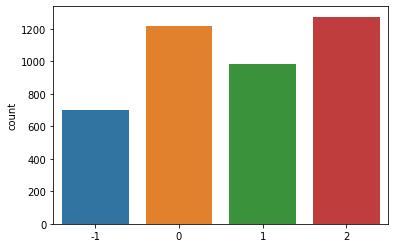

In [ ]:
sns.countplot(clustering.labels_)

Иерархический агломеративный метод с евклидовым и манхеттанским расстояниями

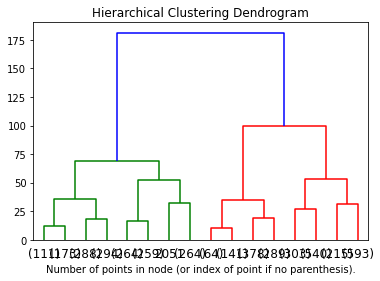

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

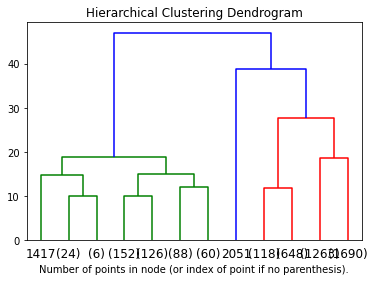

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='manhattan', linkage='complete')
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
clustering = AgglomerativeClustering(affinity='euclidean',linkage='ward', n_clusters=3).fit(X)
print_metrics(X,clustering.labels_,y)

Calinski-Harabasz index:	3707.17758
Davies–Bouldin index:		0.98161
Silhouette Coefficient:		0.32394
Cluster_cohesion:		12036.08122
Adjasted Rand Index:		0.16781216166793483
  

In [ ]:
clustering = AgglomerativeClustering(affinity='manhattan',linkage='complete', n_clusters=3).fit(X)
print_metrics(X,clustering.labels_,y,True)

Calinski-Harabasz index:	867.36840
Davies–Bouldin index:		0.59840
Silhouette Coefficient:		0.38060
Cluster_cohesion:		23605.44877
Adjasted Rand Index:		0.0060124465477011555
  

Датасет 8:

In [ ]:
df8 = pd.read_table('ionosphere.txt', header=None,delimiter=',')
names = ['Col_'+str(i) for i in range(35)]
names[34] = 'Class'
df8.columns = names
df8.head()

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,Col_10,Col_11,Col_12,Col_13,Col_14,Col_15,Col_16,Col_17,Col_18,Col_19,Col_20,Col_21,Col_22,Col_23,Col_24,Col_25,Col_26,Col_27,Col_28,Col_29,Col_30,Col_31,Col_32,Col_33,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [ ]:
df8.dropna(axis=1, how='all',inplace=True)
df8.dropna(axis=0,inplace=True)

In [ ]:
feature_names = list(df8.columns)
feature_names.remove('Class')
X = df8[feature_names]
y = df8['Class']
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [ ]:
df8['Class'].unique()

array(['g', 'b'], dtype=object)

K-means с евклидовым рассотоянием и манхеттанским (k-mediods)

In [ ]:
clustered_X = cluster.KMeans(n_clusters=2, random_state=180).fit(X)
print_metrics(X,clustered_X.labels_,y)

Calinski-Harabasz index:	95.91251
Davies–Bouldin index:		1.68190
Silhouette Coefficient:		0.27041
Cluster_cohesion:		9085.98185
Adjasted Rand Index:		0.16790201414259875
  

In [ ]:
kmedoids = KMedoids(n_clusters=2, metric='manhattan',init='k-medoids++', random_state=0).fit(X)
print_metrics(X,kmedoids.labels_,y, True)

Calinski-Harabasz index:	87.84073
Davies–Bouldin index:		1.74445
Silhouette Coefficient:		0.27808
Cluster_cohesion:		9253.86935
Adjasted Rand Index:		0.08967090257412838
  

DBSCAN с евклидовским и манхеттанским расстояними

In [ ]:
clustering = DBSCAN(eps=1.7, min_samples=12, metric='euclidean').fit(X)
n_cl = len(pd.Series(clustering.labels_).unique())
print("Число кластеров: " + str(n_cl-1))
if (n_cl > 1):
  print_metrics(X,clustering.labels_,y)


Число кластеров: 2
Calinski-Harabasz index:	17.41624
Davies–Bouldin index:		2.59692
Silhouette Coefficient:		-0.04191
Cluster_cohesion:		294.44481
Adjasted Rand Index:		0.06869801623129346
  

In [ ]:
names = ['S_'+str(i) for i in range(X.shape[1]+2)]
names[len(names)-2] = 'Class'
names[len(names)-1] = 'Tr_Class'
df_c = pd.DataFrame(np.c_[X,clustering.labels_,y], columns=names)
df_c = df_c[df_c.Class != -1]
names = ['S_'+str(i) for i in range(X.shape[1])]
print_metrics(df_c[names].values,df_c.Class.values,df_c.Tr_Class.values)

Calinski-Harabasz index:	74.55649
Davies–Bouldin index:		0.97010
Silhouette Coefficient:		0.39940
Cluster_cohesion:		3337.26996
Adjasted Rand Index:		-0.09227452088632089
  

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


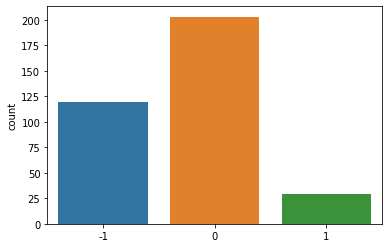

In [ ]:
sns.countplot(clustering.labels_)

In [ ]:
clustering = DBSCAN(eps=11, min_samples=5, metric='manhattan').fit(X)
n_cl = len(pd.Series(clustering.labels_).unique())
print("Число кластеров: " + str(n_cl-1))
if (n_cl > 1):
  print_metrics(X,clustering.labels_,y,True)

Число кластеров: 2
Calinski-Harabasz index:	25.47660
Davies–Bouldin index:		3.32583
Silhouette Coefficient:		0.19526
Cluster_cohesion:		3337.26996
Adjasted Rand Index:		0.4436816774241689
  

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


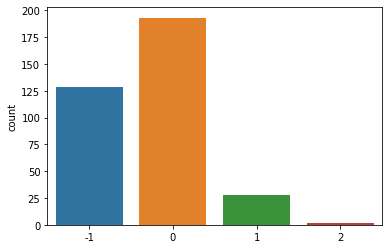

In [ ]:
sns.countplot(clustering.labels_)

Иерархический агломеративный метод с евклидовым и манхеттанским расстояниями

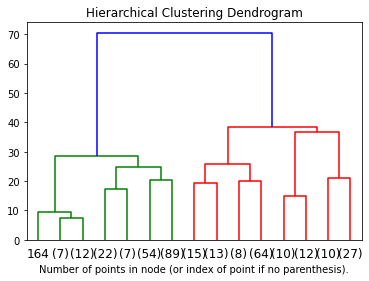

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

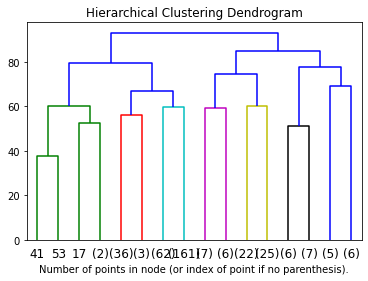

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='manhattan', linkage='complete')
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
clustering = AgglomerativeClustering(affinity='euclidean',linkage='ward', n_clusters=2).fit(X)
print_metrics(X,clustering.labels_,y)

Calinski-Harabasz index:	95.43817
Davies–Bouldin index:		1.68755
Silhouette Coefficient:		0.27130
Cluster_cohesion:		9095.67921
Adjasted Rand Index:		0.1774790893008385
  

In [ ]:
clustering = AgglomerativeClustering(affinity='manhattan',linkage='complete', n_clusters=2).fit(X)
print_metrics(X,clustering.labels_,y,True)

Calinski-Harabasz index:	17.32822
Davies–Bouldin index:		3.94652
Silhouette Coefficient:		0.23749
Cluster_cohesion:		11035.09577
Adjasted Rand Index:		0.08582580094020625
  